# Import libraries

In [1]:
import os
import tweepy as tw
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import re
import string
import nltk
from wordcloud import WordCloud 

from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
from textblob import TextBlob

# Set iPython's max column width to 1000
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_colwidth', -1)


# Input Parameter

In [2]:
TotalSearchNum = 400
#SearchKeyWrods = ["Covid","Covid-19","pandemic","coronavirus","covid 19"]
#SearchKeyWrods = ["vaccine","vaccination","vaccinated"]
SearchKeyWrods = "vaccine OR vaccination OR vaccinated"


## Load Twitter Data

In [3]:
consumer_key= 'LvRdHf5ngA2G8g0uEqJVJqNVC'
consumer_secret= '5PTWfqrpTf7FywHgjPfdHJiMGGzaKME24q9ubAB78nMvmIH71z'
access_token= '1194114471049887744-cWqTo2zFitH5qI3OmHcUCVqUD2v3f1'
access_token_secret= 'CE50qralUcPKnFhnb586p7dg5otsF96s3mngX2eKvBW2g'

In [4]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [5]:
# collect tweets which contains covid related topics
tweets1 = tw.Cursor(api.search, q = SearchKeyWrods,lang="en", since='2021-02-01', until ='2021-02-02').items(TotalSearchNum)
df1= pd.DataFrame([tweet.text for tweet in tweets1], columns = ['Tweets'])


In [6]:
tweets2 = tw.Cursor(api.search, q = SearchKeyWrods,lang="en", since='2021-02-02', until ='2021-02-03').items(TotalSearchNum)
df2= pd.DataFrame([tweet.text for tweet in tweets2], columns = ['Tweets'])


In [7]:
tweets3 = tw.Cursor(api.search, q = SearchKeyWrods,lang="en", since='2021-02-03', until ='2021-02-04').items(TotalSearchNum)
df3= pd.DataFrame([tweet.text for tweet in tweets3], columns = ['Tweets'])

In [8]:
tweets4 = tw.Cursor(api.search, q = SearchKeyWrods,lang="en", since='2021-02-04', until ='2021-02-05').items(TotalSearchNum)
df4= pd.DataFrame([tweet.text for tweet in tweets4], columns = ['Tweets'])

In [9]:
tweets5 = tw.Cursor(api.search, q = SearchKeyWrods,lang="en", since='2021-02-05', until ='2021-02-06').items(TotalSearchNum)
df5= pd.DataFrame([tweet.text for tweet in tweets5], columns = ['Tweets'])

In [10]:
tweets6 = tw.Cursor(api.search, q = SearchKeyWrods,lang="en", since='2021-02-06', until ='2021-02-07').items(TotalSearchNum)
df6= pd.DataFrame([tweet.text for tweet in tweets6], columns = ['Tweets'])

In [11]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 1 columns):
Tweets    400 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [12]:
frames = [df1, df2, df3, df4, df5, df6]
#frames = [df1, df2, df3, df4, df5]
df = pd.concat(frames)

# Data Cleaning 

In [13]:
# create a dataframe to save the tweets
#df= pd.DataFrame([tweet.text for tweet in tweets], columns = ['Tweets'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400 entries, 0 to 399
Data columns (total 1 columns):
Tweets    2400 non-null object
dtypes: object(1)
memory usage: 37.5+ KB


,Tweets
0,"With the rollout of a COVID-19 vaccine seemingly around the corner, @HunterBiz has taken the opportunity to bring t… https://t.co/7UqWBxZrFJ"
1,"Here is today’s Idaho COVID-19 vaccine data at a glance, from @IDHW. (Screen shot) https://t.co/njgZ5F9eMZ"
2,"RT @Haleaziz: DHS: ""U.S. Immigration and Customs Enforcement (ICE) and U.S. Customs and Border Protection will not conduct enforcement oper…"
3,"RT @Arrianna_Planey: ""Preliminary evidence from an analysis by KHN indicates this appears to be happening. In 23 states reporting vaccine d…"
4,@TommSciortino Here’s my top 3 off the top of my head: 1) The PPE procurement disaster 2) $10B EDD fraud and simult… https://t.co/sw8FKFfxdw


In [14]:
# clean the tweet function
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()

def cleanTweet(text):
    text = re.sub(r'@[A-Za-z0-9]+', " ", text)
    text = re.sub(r'RT[\s]+', " ", text)
    text = re.sub(r'https?:\/\/\S+', " ", text)
    text  = "".join([char.lower() for char in text if char not in string.punctuation])
    text = re.split('\W+', text)
    #text = [ps.stem(word) for word in text]   
    text = [wn.lemmatize(word) for word in text]   
    text = (" ".join(text)).strip()
    text_final = text

    return text_final


In [15]:
# cleaning the tweet
df['Tweets'] = df['Tweets'].apply(cleanTweet)

In [16]:
df.info()
#df.head(100)
df['Tweets'][0:20]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400 entries, 0 to 399
Data columns (total 1 columns):
Tweets    2400 non-null object
dtypes: object(1)
memory usage: 37.5+ KB


0     with the rollout of a covid19 vaccine seemingly around the corner ha taken the opportunity to bring t                       
1     here is today s idaho covid19 vaccine data at a glance from screen shot                                                     
2     dhs u immigration and custom enforcement ice and u custom and border protection will not conduct enforcement oper           
3     planey preliminary evidence from an analysis by khn indicates this appears to be happening in 23 state reporting vaccine d  
4     here s my top 3 off the top of my head 1 the ppe procurement disaster 2 10b edd fraud and simult                            
5     antivaccine protest at dodger stadium wa organized on facebook including promotion of banned plandemic video                
6     what we really care about is avoiding hospitalization and avoiding death and we have not seen a single person die who       
7     every single time i told a patient under the retirement age that they may fee

In [17]:
df = df.drop_duplicates(subset=['Tweets']) #drop duplicate tweets
df = df.reset_index(drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852 entries, 0 to 1851
Data columns (total 1 columns):
Tweets    1852 non-null object
dtypes: object(1)
memory usage: 14.5+ KB


In [18]:
df.head(10)

,Tweets
0,with the rollout of a covid19 vaccine seemingly around the corner ha taken the opportunity to bring t
1,here is today s idaho covid19 vaccine data at a glance from screen shot
2,dhs u immigration and custom enforcement ice and u custom and border protection will not conduct enforcement oper
3,planey preliminary evidence from an analysis by khn indicates this appears to be happening in 23 state reporting vaccine d
4,here s my top 3 off the top of my head 1 the ppe procurement disaster 2 10b edd fraud and simult
5,antivaccine protest at dodger stadium wa organized on facebook including promotion of banned plandemic video
6,what we really care about is avoiding hospitalization and avoiding death and we have not seen a single person die who
7,every single time i told a patient under the retirement age that they may feel a little rubbish for 2472 hour aft
8,cuppa that is my point no one need 5 shot so why buy them ready for a furth
9,if we want to reopen k12 shouldn t teacher and staff be a top priority for vaccination am i missing something


In [19]:
# after cleaning the initial tweets, the next step is to pick the tweets related to vaccine
#df_vaccine = pd.DataFrame()
Total_Covid_Vaccine_tweets = 0
df["Vaccine + Covid"] = False

Total_Covid_Vaccine_tweets = 0
j = 0
for tweet in df["Tweets"]:
        if 'covid' in tweet or 'covid-19' in tweet or 'coronavirus' in tweet \
        or 'pandamic' in tweet or 'covid19' in tweet or 'social distance' in tweet \
        or 'cov2' in tweet or 'quarantine' in tweet or 'moderna' in tweet or 'oxford' in tweet \
        or 'pfizer' in tweet or 'isreal' in tweet or 'reopen' in tweet or 'social distance' in tweet:
                   df["Vaccine + Covid"][j] = True
                   Total_Covid_Vaccine_tweets +=1
        j = j + 1
        
        
print(Total_Covid_Vaccine_tweets)
df = df[df["Vaccine + Covid"] == True]

df = df.reset_index(drop = True)
#df = df['vaccine' in df.Tweets == True]

/Users/weiweiwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


548


In [20]:
df.head(10)

,Tweets,Vaccine + Covid
0,with the rollout of a covid19 vaccine seemingly around the corner ha taken the opportunity to bring t,True
1,here is today s idaho covid19 vaccine data at a glance from screen shot,True
2,if we want to reopen k12 shouldn t teacher and staff be a top priority for vaccination am i missing something,True
3,biden oversees 40k covid death in 10 day loses 20m vaccine dos oann,True
4,openshaw nice short report the ab response to single vaccine dose in those whove had covid equalsexceeds those seen after regular,True
5,fl is largely open ny far more restricted fl ha 2m more resident than ny amp far more senior fl 26k covid death,True
6,chickfila manager save south carolina drivethru covid19 vaccination clinic after traffic backup ht,True
7,winter storm delay and closure covid19 vaccine site closed 22 covid19 test site plan to reopen at noon 22 ou,True
8,who getting the covid vaccination often it not those who might need it most via,True
9,boris johnson emergency service to receive covid vaccine a priority sign the petition via,True


In [21]:
Total_Covid_Vaccine_tweets


548

# Data Analysis 

In [22]:
# get the subjectivity, polarity, sediment analysis
def GetSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def GetPolarity(text):
    return TextBlob(text).sentiment.polarity

def GetPositiveAnalysis(polarity):
    if polarity > 0.0:
        return "Positive"
    if polarity == 0.0:
        return "Neutral"
    if polarity < 0.0:
        return "Negative"

df['Subjectivity'] = df['Tweets'].apply(GetSubjectivity)
df['Polarity'] = df['Tweets'].apply(GetPolarity)
df['Analysis'] = df['Polarity'].apply(GetPositiveAnalysis)

df.head()

,Tweets,Vaccine + Covid,Subjectivity,Polarity,Analysis
0,with the rollout of a covid19 vaccine seemingly around the corner ha taken the opportunity to bring t,True,0.000000,0.000000,Neutral
1,here is today s idaho covid19 vaccine data at a glance from screen shot,True,0.000000,0.000000,Neutral
2,if we want to reopen k12 shouldn t teacher and staff be a top priority for vaccination am i missing something,True,0.275000,0.150000,Positive
3,biden oversees 40k covid death in 10 day loses 20m vaccine dos oann,True,0.100000,-0.300000,Negative
4,openshaw nice short report the ab response to single vaccine dose in those whove had covid equalsexceeds those seen after regular,True,0.397802,0.132143,Positive


In [23]:
# function to calculate percentage
def percentage(part, whole):
        temp = 100 * float(part) / float(whole)
        return format(temp, '.2f')

In [24]:
positive = 0
polarity = 0
neutral = 0
negative = 0

for tweet in df['Tweets']:
    #print(tweet.t)
    analysis = TextBlob(tweet)
    polarity += analysis.sentiment.polarity
    
    if (analysis.sentiment.polarity > 0.00):
        positive +=1
        
    if (analysis.sentiment.polarity < 0.00):
        negative +=1
        
    if (analysis.sentiment.polarity == 0.00):
        neutral +=1

TotalSearchNum = df.shape[0]
positive = percentage(positive, TotalSearchNum)
negative = percentage(negative, TotalSearchNum)
neutral = percentage(neutral, TotalSearchNum)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 5 columns):
Tweets             548 non-null object
Vaccine + Covid    548 non-null bool
Subjectivity       548 non-null float64
Polarity           548 non-null float64
Analysis           548 non-null object
dtypes: bool(1), float64(2), object(2)
memory usage: 17.7+ KB


In [33]:
print('negative percentage is ' + negative +"%")

negative percentage is 18.43%


In [34]:
print('neutral percentage is ' + neutral +"%")

neutral percentage is 37.23%


In [35]:
print('positive percentage is ' + positive +"%")

positive percentage is 44.34%


In [28]:
def plotPieChart(positive, negative, neutral, SearchKeyWrods, TotalSearchNum):
        labels = ['Positive [' + str(positive) + '%]', 'Neutral [' + str(neutral) + '%]',
                  'Negative [' + str(negative) + '%]']
        sizes = [positive,  neutral, negative]
        colors = ['green', 'gold', 'red']
        patches, texts = plt.pie(sizes, colors=colors, startangle=90)
        plt.legend(patches, labels, loc="best")
        plt.title("How people are reacting on covid vaccine"  + "by analyzing "  + str(TotalSearchNum) + " Tweets.")
        plt.axis('equal')
        plt.tight_layout()
        plt.show()

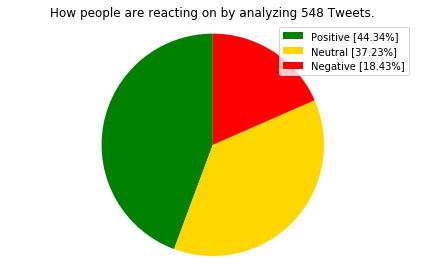

In [29]:
plotPieChart(positive,negative,neutral,SearchKeyWrods, TotalSearchNum)

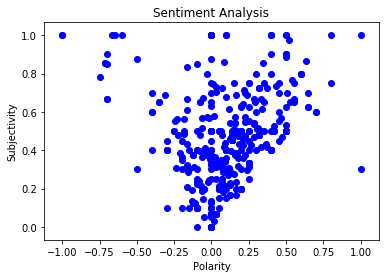

In [30]:
# plot the polarity and subjectivity
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

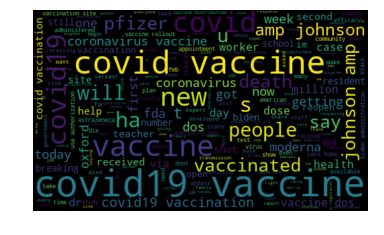

In [31]:
# plot the word Cloud
 
allWords = ' '.join(tweet for tweet in df['Tweets'])
wordCloud = WordCloud(width = 500, height =300, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()